In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.drop('ID#',axis=1,inplace=True)
scaler=StandardScaler()
df_2=scaler.fit_transform(df)
df_3=pd.DataFrame(df_2,columns=('Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?'))

Text(0, 0.5, 'wcss')

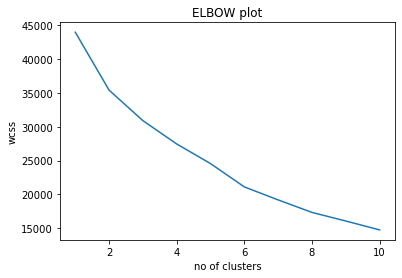

In [5]:
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    df_kmeans=kmeans.fit(df_3)
    WCSS.append(df_kmeans.inertia_)
plt.plot(range(1,11),WCSS)
plt.title('ELBOW plot')
plt.xlabel('no of clusters')
plt.ylabel('wcss')

In [6]:
kmeans=KMeans(n_clusters=3,random_state=0)
df_kmeans=kmeans.fit(df_3)
df['kmeans_cluster']=df_kmeans.labels_

In [7]:
df.groupby(['kmeans_cluster']).agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
kmeans_cluster,,,,,,,,,,,
0,44370.730307,96.720605,1.237097,1.019014,1.000388,4837.902212,7.015134,200.463718,0.625534,3707.357004,0.204501
1,117627.582671,157.884738,3.732114,1.002385,1.038156,40499.723370,18.991256,346.263911,1.025437,4883.024642,0.652623
2,195200.231707,783.207317,2.152439,1.036585,1.000000,31379.963415,26.993902,5412.000000,15.798780,4715.945122,0.810976


In [8]:
df[df['kmeans_cluster']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [9]:
df[df['kmeans_cluster']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
6,84914,0,3,1,1,27482,25,0,0,6994,0,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,28495,0,4,1,1,49442,15,0,0,6912,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,1
3980,28867,0,3,1,1,19169,28,0,0,1425,0,1
3985,59017,0,4,1,1,34746,25,0,0,1418,0,1
3991,39142,0,3,1,1,14981,28,0,0,1408,0,1


In [10]:
df[df['kmeans_cluster']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster
8,443003,0,3,2,1,1753,43,3850,12,6948,1,2
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,2
42,60313,0,1,1,1,10000,26,3250,9,7829,1,2
50,108137,0,1,1,1,6368,5,6368,5,6844,0,2
65,53914,0,3,1,1,33767,45,5550,29,6826,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,0,2
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,2
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,2
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,2


#  Hierarchical cluster

In [11]:
from sklearn.cluster import AgglomerativeClustering
data_1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
data_1=data_1.fit_predict(df_3)

In [12]:
data_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
df['Hierarchical_cluster']=data_1

In [14]:
df.groupby(['Hierarchical_cluster']).agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_cluster,,,,,,,,,,,,
0,7.313442e+04,143.947421,2.059339,1.014522,1.012268,17096.29319,11.539059,439.434151,1.32023,4119.688282,0.369554,0.394592
1,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.25000,69.250000,19960.000000,49.25000,2200.250000,1.000000,2.000000
2,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.00000,32.000000,4823.000000,23.00000,7283.000000,1.000000,2.000000


In [15]:
df.groupby(['kmeans_cluster']).agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_cluster
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
kmeans_cluster,,,,,,,,,,,,
0,44370.730307,96.720605,1.237097,1.019014,1.000388,4837.902212,7.015134,200.463718,0.625534,3707.357004,0.204501,0.000000
1,117627.582671,157.884738,3.732114,1.002385,1.038156,40499.723370,18.991256,346.263911,1.025437,4883.024642,0.652623,0.000000
2,195200.231707,783.207317,2.152439,1.036585,1.000000,31379.963415,26.993902,5412.000000,15.798780,4715.945122,0.810976,0.036585


# DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

In [17]:
data_2=DBSCAN(eps=0.8,min_samples=24)
data_2=data_2.fit(df_3)
df['DBSCAN_cluster']=data_2.labels_

In [18]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster,Hierarchical_cluster,DBSCAN_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0,0


In [21]:
df['DBSCAN_cluster'].value_counts()

 0    2066
-1    1174
 1     759
Name: DBSCAN_cluster, dtype: int64